In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
def scatterplot_X_vs_Y(data : pd.DataFrame, x: str, y: str, titel: str, xlabel: str, ylabel: str, 
                       show_text_if_more_than_x=0, show_text_if_more_than_y=0, ishue=False, islegend=False, legend_titel='', hue=''):
    if ishue:
        plot = sns.scatterplot(data=df_datasets, 
                x=x, 
                y=y,
                hue=hue, 
                palette='viridis', 
                alpha=0.7)
    else:
        plot = sns.scatterplot(data=df_datasets, 
                x=x, 
                y=y,  
                alpha=0.7)
    
    for i, row in df_datasets.iterrows():
        if (row[y] > show_text_if_more_than_y and 
            row[x] > show_text_if_more_than_x):
            plt.text(
                row[x], 
                row[y], 
                str(row['Dataset']), 
                fontsize=8, 
                alpha=0.7
        )
    plt.title(titel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if islegend:
        plt.legend(title=legend_titel)
    plt.grid(True)
    return plot

In [14]:
df_datasets = pd.read_csv('datasets.csv', delimiter=';', quotechar='"')

In [15]:
print("Basic Info:\n")
print(df_datasets.info())

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Dataset                                                                                       50 non-null     object
 1   Number of citations (Google Scholar since 2020)                                               49 non-null     object
 2   Number of usage (Papers with code since 2020)                                                 50 non-null     object
 3   Music/Speech/Sounds                                                                           50 non-null     object
 4   Link                                                                                          50 non-null     object
 5   Paper Link               

In [16]:
numeric_columns = ['Number of citations (Google Scholar since 2020)', 'Number of usage (Papers with code since 2020)', 
                   'Score or best score in Paper', 'Size (Hours)', 
                   'Number of Benchmarks (Audio Classification or Recognition Papers with Code different models)',
                   'Best Scoure']

df_datasets[numeric_columns] = df_datasets[numeric_columns].replace({',':'.'}, regex=True)
df_datasets[numeric_columns] = df_datasets[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [17]:
# top 5 most cited datasets
most_cited = df_datasets.nlargest(5, 'Number of citations (Google Scholar since 2020)')
print("\nTop 5 Most Cited Datasets:\n")
print(most_cited[['Dataset', 'Number of citations (Google Scholar since 2020)']])

# top 5 most used datasets
most_used = df_datasets.nlargest(5, 'Number of usage (Papers with code since 2020)')
print("\nTop 5 Most Used Datasets:\n")
print(most_used[['Dataset', 'Number of usage (Papers with code since 2020)']])

# datasets by category
category_counts = df_datasets['Music/Speech/Sounds'].value_counts()
print("\nDatasets by Category:\n")
print(category_counts)


Top 5 Most Cited Datasets:

               Dataset  Number of citations (Google Scholar since 2020)
15   TUT Sound Events                                           16800.0
29                MELD                                          11900.0
5          LibriSpeech                                           8850.0
13  Speech Commands V2                                           8260.0
46               Wham!                                           7660.0

Top 5 Most Used Datasets:

        Dataset  Number of usage (Papers with code since 2020)
5   LibriSpeech                                         1891.0
0      AudioSet                                          581.0
39      IEMOCAP                                          558.0
10     VoxCeleb                                          490.0
8   CommonVoice                                          363.0

Datasets by Category:

Music/Speech/Sounds
Sounds          24
Speech          18
Music            7
Music; Sound     1
Name: count, 

In [18]:
category_counts = category_counts.drop("Music; Sound")
category_counts["Sounds"] += 1
category_counts["Music"] += 1

expanded_rows = []
for _, row in df_datasets.iterrows():
    if row['Music/Speech/Sounds'] == 'Music; Sound':
        row_music = row.copy()
        row_music['Music/Speech/Sounds'] = 'Music'
        expanded_rows.append(row_music)

        row_sounds = row.copy()
        row_sounds['Music/Speech/Sounds'] = 'Sounds'
        expanded_rows.append(row_sounds)
    else:
        expanded_rows.append(row)

df_datasets = pd.DataFrame(expanded_rows)

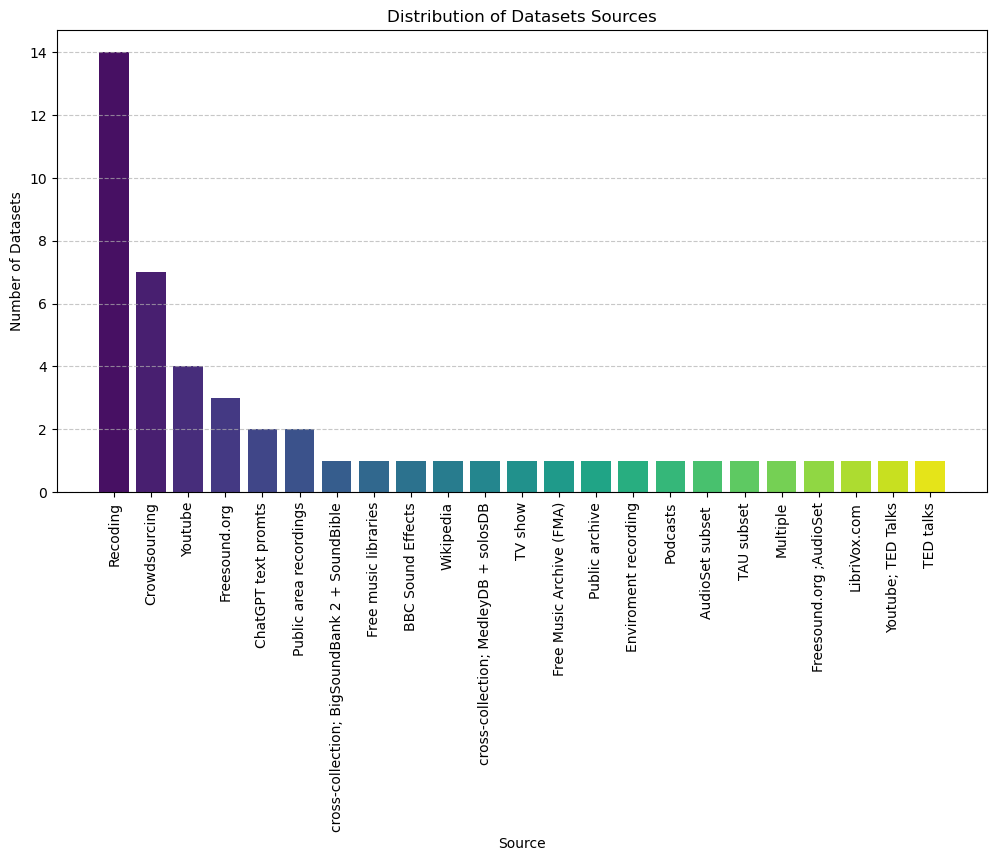

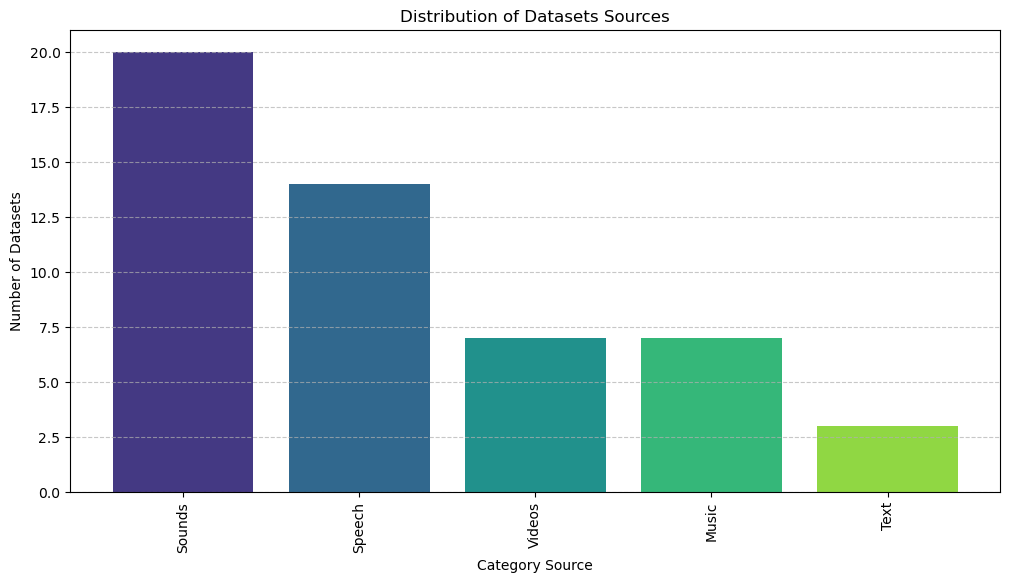

In [21]:
sources_counts = df_datasets['Source'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(sources_counts.index, sources_counts.values, color=sns.color_palette('viridis', len(sources_counts)))
plt.title('Distribution of Datasets Sources')
plt.xlabel('Source')
plt.ylabel('Number of Datasets')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

sources_category_counts = df_datasets['Category Source'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(sources_category_counts.index, sources_category_counts.values, color=sns.color_palette('viridis', len(sources_category_counts)))
plt.title('Distribution of Datasets Sources')
plt.xlabel('Category Source')
plt.ylabel('Number of Datasets')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

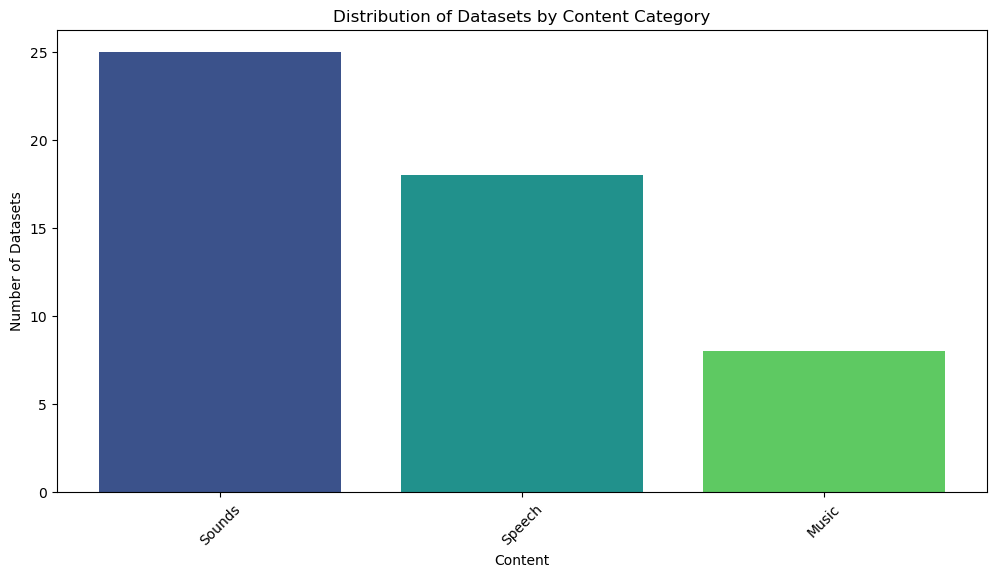

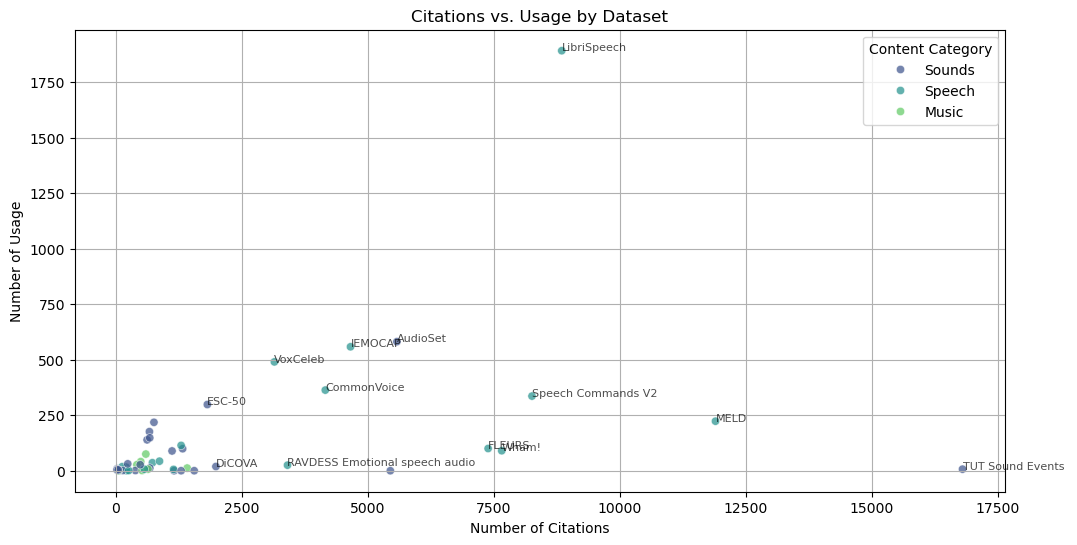

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(category_counts.index, category_counts.values, color=sns.color_palette('viridis', len(category_counts)))
plt.title('Distribution of Datasets by Content Category')
plt.xlabel('Content')
plt.ylabel('Number of Datasets')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plot = scatterplot_X_vs_Y(df_datasets, x='Number of citations (Google Scholar since 2020)', y='Number of usage (Papers with code since 2020)',
                         titel='Citations vs. Usage by Dataset', xlabel='Number of Citations', ylabel='Number of Usage', ishue=True, hue='Music/Speech/Sounds', 
                          islegend=True, legend_titel='Content Category', show_text_if_more_than_x=1800) 
plt.show()

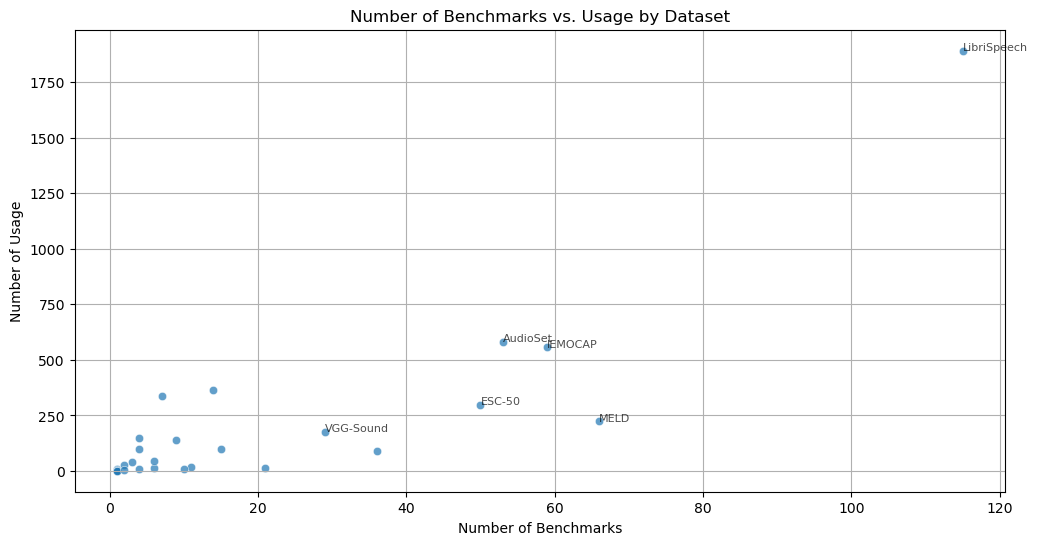

In [20]:
plt.figure(figsize=(12, 6))
plot = scatterplot_X_vs_Y(df_datasets, 'Number of Benchmarks (Audio Classification or Recognition Papers with Code different models)', 
                                'Number of usage (Papers with code since 2020)', 'Number of Benchmarks vs. Usage by Dataset',
                               'Number of Benchmarks', 'Number of Usage', 15, 100)

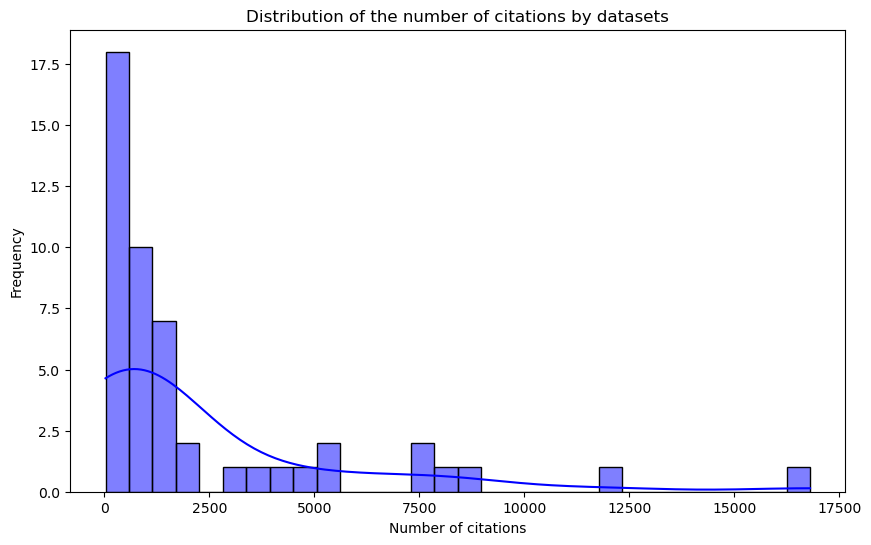

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df_datasets['Number of citations (Google Scholar since 2020)'], bins=30, kde=True, color='blue')
plt.title('Distribution of the number of citations by datasets')
plt.xlabel('Number of citations')
plt.ylabel('Frequency')
plt.show()

C:\Users\looki\AppData\Local\Temp\ipykernel_7260\2211531651.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_datasets, x='Year', palette='coolwarm', order=sorted(df_datasets['Year'].dropna().unique()))


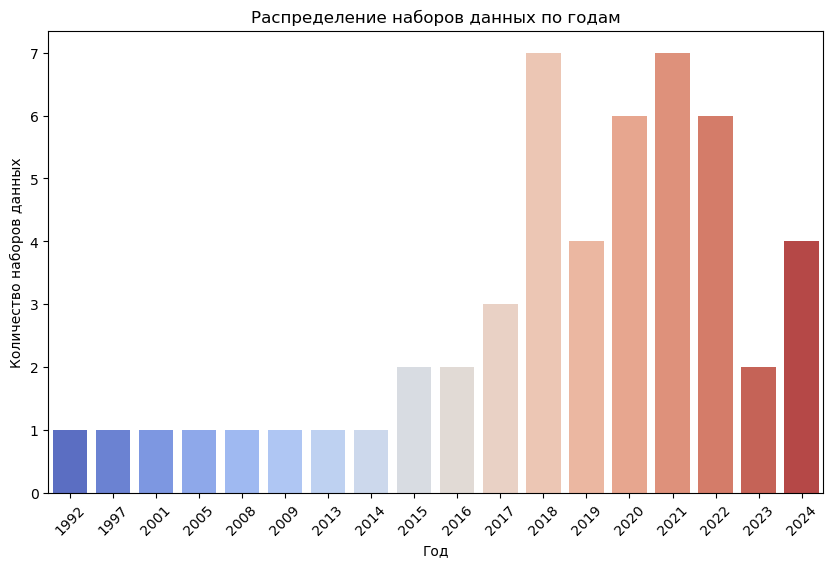

Топ-10 самых цитируемых наборов данных:
               Dataset  Number of citations (Google Scholar since 2020)
15   TUT Sound Events                                           16800.0
29                MELD                                          11900.0
5          LibriSpeech                                           8850.0
13  Speech Commands V2                                           8260.0
46               Wham!                                           7660.0
31              FLEURS                                           7390.0
0             AudioSet                                           5580.0
41              DEMAND                                           5450.0
39             IEMOCAP                                           4660.0
8          CommonVoice                                           4160.0


In [44]:
# 3. Распределение наборов данных по годам
if 'Year' in df_datasets.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(df_datasets, x='Year', palette='coolwarm', order=sorted(df_datasets['Year'].dropna().unique()))
    plt.title('Распределение наборов данных по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество наборов данных')
    plt.xticks(rotation=45)
    plt.show()
else:
    print('Колонка "Year" отсутствует в данных.')

# Дополнительные идеи для анализа
# 4. Топ-10 самых цитируемых наборов данных
print("Топ-10 самых цитируемых наборов данных:")
print(df_datasets.nlargest(10, 'Number of citations (Google Scholar since 2020)')[['Dataset', 'Number of citations (Google Scholar since 2020)']])


In [24]:
df_datasets_original_classification = df_datasets[df_datasets['Original Use Case'].str.contains('classification', na=False)]

In [25]:
# top 5 most cited datasets
most_cited = df_datasets_original_classification.nlargest(5, 'Number of citations (Google Scholar since 2020)')
print("\nTop 5 Most Cited Datasets:\n")
print(most_cited[['Dataset', 'Number of citations (Google Scholar since 2020)']])

# top 5 most used datasets
most_used = df_datasets_original_classification.nlargest(5, 'Number of usage (Papers with code since 2020)')
print("\nTop 5 Most Used Datasets:\n")
print(most_used[['Dataset', 'Number of usage (Papers with code since 2020)']])

# datasets by category
category_counts = df_datasets_original_classification['Music/Speech/Sounds'].value_counts()
print("\nDatasets by Category:\n")
print(category_counts)


Top 5 Most Cited Datasets:

              Dataset  Number of citations (Google Scholar since 2020)
15  TUT Sound Events                                           16800.0
38             DiCOVA                                           1990.0
4              ESC-50                                           1820.0
42    Coswara Dataset                                           1560.0
3        UrbanSound8K                                           1330.0

Top 5 Most Used Datasets:

                            Dataset  \
4                            ESC-50   
22  EPIC-SOUNDS (EPIC-KITCHENS-100)   
7                            FSD50K   
3                      UrbanSound8K   
45                         CoughVid   

    Number of usage (Papers with code since 2020)  
4                                           298.0  
22                                          148.0  
7                                           139.0  
3                                            99.0  
45                    

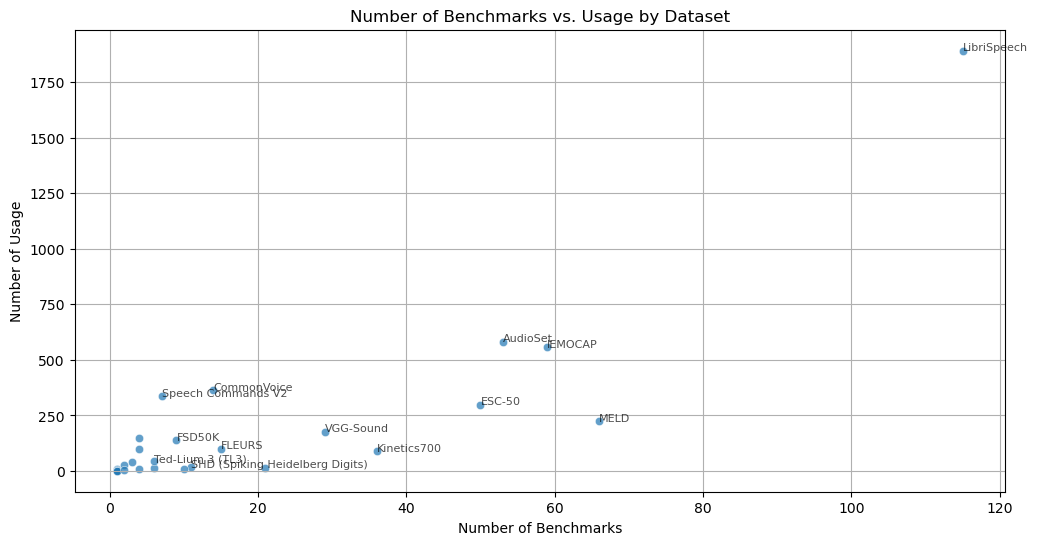

In [33]:
plt.figure(figsize=(12, 6))
plot = scatterplot_X_vs_Y(df_datasets_original_classification, 'Number of Benchmarks (Audio Classification or Recognition Papers with Code different models)', 
                                'Number of usage (Papers with code since 2020)', 'Number of Benchmarks vs. Usage by Dataset',
                               'Number of Benchmarks', 'Number of Usage',5,15)
plt.show()